In [1]:
import torch
from repop import dataset,params2theta,theta2params
from matplotlib import pyplot as plt
import pandas as pd

import numpy as np
np.random.seed(42)

In [2]:
cutoff = 300
df = pd.read_csv('real_data/Exp_1_Ecoli_population.csv')
df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce').fillna(np.inf)
df.iloc[:,2] = pd.to_numeric(df.iloc[:,2], errors='coerce').fillna(0)

dil_schedule = np.array((20,200,2000))/.9

/tmp/ipykernel_39439/808629437.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce').fillna(np.inf)
/tmp/ipykernel_39439/808629437.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,2] = pd.to_numeric(df.iloc[:,2], errors='coerce').fillna(0)


In [3]:
def get_counts(df,day):
    ks = df.to_numpy()[df['Day']==day,1:3]

    cts,dils =[],[]
    for k_line in ks:
        index = np.argmax(k_line <= cutoff) if np.any(ks <= cutoff) else len(ks) - 1
        cts.append( k_line[index] )
        dils.append( dil_schedule[index] )

    cts,dils = np.array(cts).astype(int),np.array(dils).astype(float)
    keep = np.logical_and(cts<=300,  cts>=0)

    return cts[keep],dils[keep]

In [4]:
days = (3,5,7,9)

data_day =[]
for day in days:
    cts,dils = get_counts(df,day)
    data_day.append(dataset(cts,dils))
    (data_day[-1]).evaluate()

5.2984954543402125 -301.5316747594079 -79.32084256323802
4.636398887067582 -269.36865510717337 -64.41769339314104
4.4798326341422845 -265.3426643217133 -57.11032142205292
4.354753483249764 -261.22774338483725 -52.29355929443256
4.300631295051164 -261.0164453891889 -48.605981323324684
4.249463071636277 -261.11409668011856 -44.833003214555916
4.21184372344086 -261.3178794097112 -41.91626565714296
4.15200321954993 -261.04614566216696 -37.87376667313068
4.105700585137194 -261.31783492857835 -34.28019462134652
4.06006785801909 -261.66215846987075 -30.632315402983764
4.009358245101583 -261.37237644303895 -27.291881462464698
7.85243679118176 -309.0542095426606 -82.59455352193966
6.045916094807043 -236.37109663190643 -65.86734758570176
5.955558772629498 -235.91484154155194 -61.85433068865398
5.903482109412753 -236.24123899011892 -58.928187142897514
5.881341283810019 -236.31835627871772 -57.74379333507306
5.864958070480589 -236.4219305751074 -56.8210241608829
5.8438322824005375 -236.38451021211

/tmp/ipykernel_39439/1270109755.py:10: RuntimeWarning: invalid value encountered in cast
  cts,dils = np.array(cts).astype(int),np.array(dils).astype(float)


7.526353441448318 -409.9919141225854 -93.2554960337195
6.507840471064418 -360.7348981422798 -75.24310091807025
6.446466251115798 -361.3365995453429 -70.5673578506818
6.417504016432001 -362.04951526344126 -67.90716924010931
6.383631400670827 -362.4681009635632 -65.22766890886025
6.3506470118074025 -362.7789364453919 -62.70279346145142
6.3007885837786475 -362.26021527850617 -59.874696576292436
6.256762892671492 -362.2276167184224 -56.96114102968363
6.207570324899863 -362.0489781619981 -53.84319845783155
6.171356610563096 -362.23035997232455 -51.23581481762339
6.1458775595929325 -362.3857826575718 -49.38228318679887
6.137220446640897 -362.5377937839487 -48.65377477593748
6.121804590673612 -362.608972380223 -47.5427162400842
6.094877681734752 -362.4420236720145 -45.90896054334151
6.0818060211494585 -362.31323432474267 -45.163878971472016
6.074592447055961 -362.39817664483553 -44.59858286397178


/tmp/ipykernel_39439/1270109755.py:10: RuntimeWarning: invalid value encountered in cast
  cts,dils = np.array(cts).astype(int),np.array(dils).astype(float)


8.100828881704473 -430.2613711014011 -95.12678170686927
7.027640665571109 -383.39363684511056 -73.3688904573073
6.966100872170796 -384.4498261067838 -68.3399682123314
6.947542956401559 -385.18823769139965 -66.39794387050279
6.932595623058261 -385.84431284063913 -64.76744274398871
6.90308504568767 -386.47786570065125 -62.20651280297498
6.874621803056973 -386.85884522715867 -59.98471578454479
6.852153669229504 -386.96844764237824 -58.41051243132755
6.80848977529026 -386.70955339307227 -55.827314044103076
6.766379557821593 -386.72921533196757 -53.07261948882064
6.729590497314126 -386.76853019727366 -50.645341562849346
6.706643400763304 -386.7817211057121 -49.14382002976243


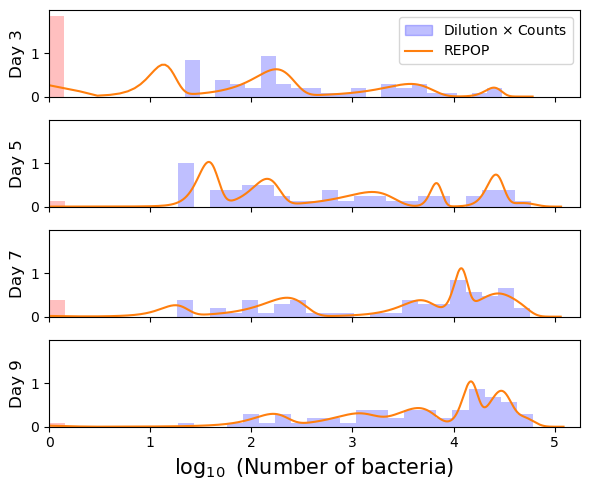

In [6]:
fig,ax = plt.subplots(4,figsize=(6,5),sharex='col')
data_day[0].log_plots(ax[0]) 
[dt.log_plots(axi,legend=False) for (dt,axi) in zip(data_day[1:],ax[1:])]
ym = max([axi.get_ylim()[-1] for axi in ax])
[(axi.set_xlim(0,5.25),axi.set_ylim(0,ym*1.02)) for axi in ax] 
[axi.set_ylabel('Day {}'.format(i),fontsize=12) for (axi,i) in zip(ax,(3,5,7,9))]
[axi.set_xlabel('') for axi in ax[:-1]]

plt.tight_layout()
plt.savefig('graphs/worms.png',dpi=500)